In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [20]:
HCL_st = pd.read_csv('HCL.csv')
HCL_st

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HCLTECH,EQ,1-Jan-16,855.10,855.10,855.10,843.50,845.6,845.85,846.83,485196,410880355.7,9066,291168,60.01
1,HCLTECH,EQ,4-Jan-16,845.85,841.00,854.95,837.45,846.95,845.95,843.36,1086036,915919738.5,43114,540113,49.73
2,HCLTECH,EQ,5-Jan-16,845.95,848.95,851.05,836.40,844,842.80,842.45,732691,617257642.2,41363,456084,62.25
3,HCLTECH,EQ,6-Jan-16,842.80,853.70,853.70,837.00,841,841.40,843.19,1398935,1179563879,58050,971039,69.41
4,HCLTECH,EQ,7-Jan-16,841.40,836.10,837.90,819.00,825.5,825.05,827.47,1450657,1200371675,51218,951629,65.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,HCLTECH,EQ,4-May-21,907.70,910.00,915.00,899.25,902.95,900.95,907.88,6217026,5644301124,168209,4062318,65.34
1322,HCLTECH,EQ,5-May-21,900.95,903.95,910.80,900.60,910.15,909.40,906.28,2696835,2444085189,101282,1203503,44.63
1323,HCLTECH,EQ,6-May-21,909.40,912.00,923.90,901.25,915.2,916.00,911.90,6319104,5762420236,143748,3197706,50.6
1324,HCLTECH,EQ,7-May-21,916.00,918.00,921.40,913.70,915.55,916.40,917.07,"36,51,558","3,34,87,26,455.40",78952,"21,14,655",57.91


In [23]:
HCL_st = HCL_st.dropna()
HCL_st.index = pd.to_datetime(HCL_st.Date)
HCL_st = HCL_st['Close Price']['01-01-2016':'12-31-2016']
HCL_st

Date
2016-01-01    845.85
2016-01-04    845.95
2016-01-05    842.80
2016-01-06    841.40
2016-01-07    825.05
               ...  
2016-12-26    790.40
2016-12-27    804.85
2016-12-28    807.05
2016-12-29    819.35
2016-12-30    827.95
Name: Close Price, Length: 248, dtype: float64

In [24]:
HCL_st_log = HCL_st.apply(lambda x:np.log(x))

<Figure size 720x576 with 0 Axes>

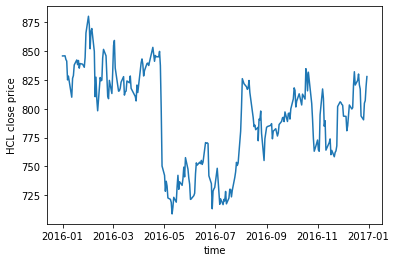

In [16]:
plt.figure(figsize=(10,8))
fig, ax = plt.subplots(1)
ax.set_xlabel('time')
ax.set_ylabel('HCL close price')
plt.plot(HCL_st)

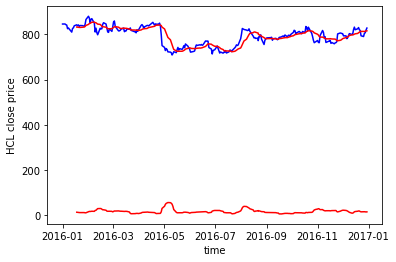

In [19]:
roll_mean = HCL_st.rolling(12).mean()
roll_std = HCL_st.rolling(12).std()

fig, ax = plt.subplots(1)
ax.set_xlabel('time')
ax.set_ylabel('HCL close price')
plt.plot(HCL_st, color = 'blue', label = 'Origin')
plt.plot(roll_mean, color = 'red', label = 'Rolling mean')
plt.plot(roll_std, color = 'red', label = 'Rolling stddev')

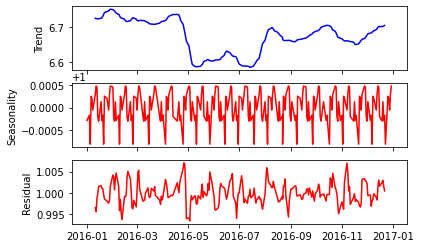

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(HCL_st_log, period = 12, model ='multiplicative')

trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

fig, ax = plt.subplots(3, sharex=True)
ax[0].set_ylabel('Trend')
ax[1].set_ylabel('Seasonality')
ax[2].set_ylabel('Residual')
ax[0].plot(trend, color = 'blue', label = 'Trend')
ax[1].plot(seasonality, color = 'red', label = 'Seasonality')
ax[2].plot(residual, color = 'red', label = 'Residual')

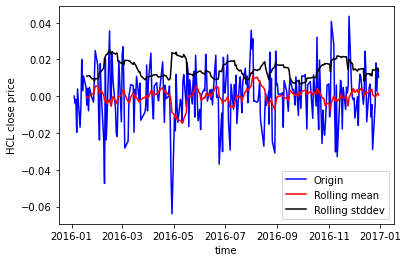

In [36]:
HCL_st_log_diff = HCL_st_log.diff()
log_diff_roll_mean = HCL_st_log_diff.rolling(12).mean()
log_diff_roll_std = HCL_st_log_diff.rolling(12).std()

fig, ax = plt.subplots(1)
ax.set_xlabel('time')
ax.set_ylabel('HCL close price')
plt.plot(HCL_st_log_diff, color = 'blue', label = 'Origin')
plt.plot(log_diff_roll_mean , color = 'red', label = 'Rolling mean')
plt.plot(log_diff_roll_std, color = 'black', label = 'Rolling stddev')
plt.legend(loc='best')